## Chi-Squared Analysis

### First Question: Did more women and children survived compare to men?

Dataset from Canvas (Titanic_Passenger_List.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
    - 
- What kind of data is the `Gender` (indep. variable)?
    - Nonimal 

Two Types:
    - `Ordinal` data.  Date that can be ordered
    - `Categorical/nominal`. Data that can not be ordered

In [2]:
# Margins = True will show the summery
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
# Excludes the last column and row Summary
# For plotting do not include the margins = True
print(contingency_table)

Lived_Died  died  lived
Gender                 
Female       143    339
Male         709    161


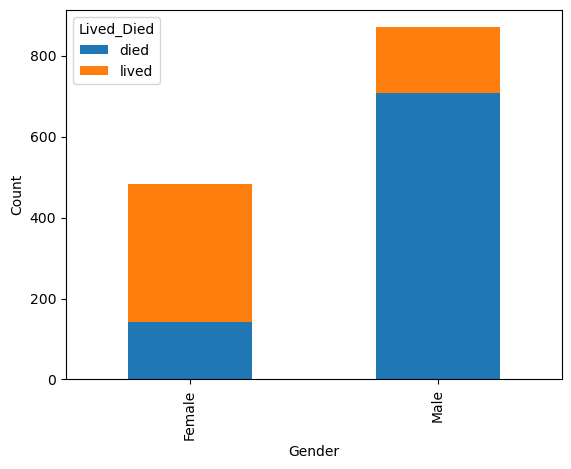

In [3]:
# Task: Create a Stacked bar char showing the number of passenger by gender
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.show()

In [4]:
from scipy import stats # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])
# You get 3 values back
# 1) Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure chance
# 2) Target P-value: 
# 3) Degree of freedom: 1 degree if freedom. (r rows - 1) * ( r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-square Example: Was Age relevant?

In [9]:
# Check age column: Age column is the age they where during the titanic incident
# What about the null values
print(passenger_df.isnull().sum())

# Create the Bins
#passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins= range(0, 90, 10)) # ^ Another way to do the above

contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Name                0
Born               24
Died               43
Age                24
Gender              0
Passenger_Class     0
Lived_Died          0
Fare               31
Fare_decimal       31
age_bins           24
dtype: int64
Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\gambl\AppData\Local\Temp\ipykernel_3856\3297845806.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


Text(0.5, 1.0, 'Histogram of Age Ranges')

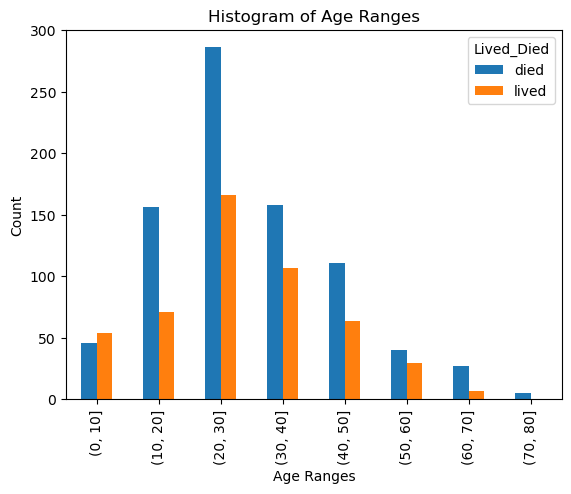

In [14]:
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Histogram of Age Ranges')

In [36]:
# Create a heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


C:\Users\gambl\AppData\Local\Temp\ipykernel_3856\838029817.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_Int', index=['Gender'], columns=['age_bins'])
C:\Users\gambl\AppData\Local\Temp\ipykernel_3856\838029817.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x)


<Axes: xlabel='age_bins', ylabel='Gender'>

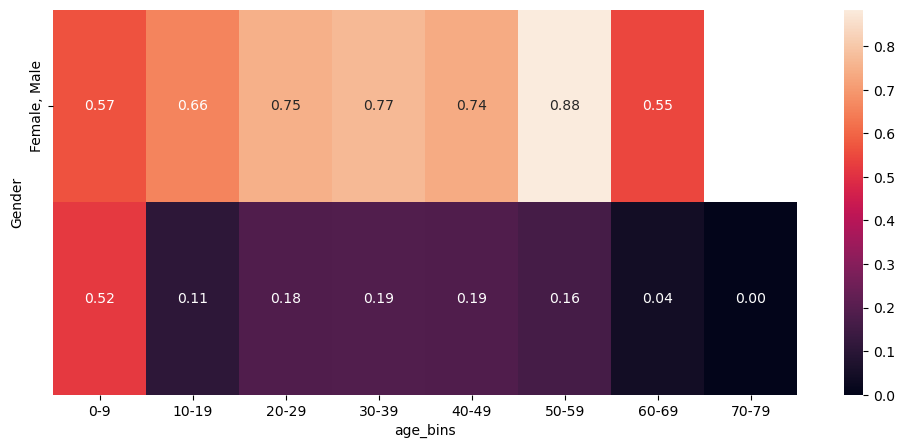

In [32]:
# Drop Column you do not want
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
passenger_df.dropna(inplace=True)

le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_Int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_Int', index=['Gender'], columns=['age_bins']) 
pivot_table.applymap(lambda x: 1-x)

plt.figure(figsize=(12,5))
x_axis_lables = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female, Male'], xticklabels=x_axis_lables, fmt='.2f', cmap='rocket')

In [35]:
# Create a contingency table
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Passenger_Class,,,
1,149,201,350
2,175,118,293
3,528,181,709
All,852,500,1352


<Axes: xlabel='Lived_Died'>

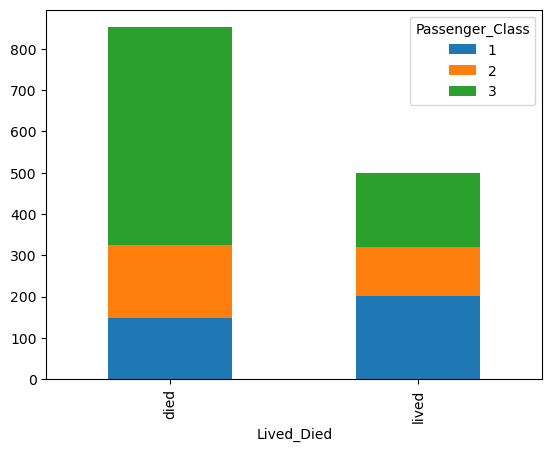

In [41]:
# Create a Bar Plot with the data stacked
contingency_table = pd.crosstab( passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)

In [44]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]


(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at lear `one` of the passenger class different from what we would expect if the variables were independent
- Since this our first test, it is considered a `Prioro Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compare every passenger class to every other class to see if there is statistical significance between the two.
- We could apply a `Chi-square` test for for each of the three separate comparison, but the sample data is to small
- in this case `Fisher's Exact` test is a better option

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [49]:
first_class = contingency_table.iloc[0].values # Extracts rows values
second_class = contingency_table.iloc[1].values # Extracts rows values
third_class = contingency_table.iloc[2].values # Extracts rows values
# Create a Fisher's Exact Test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact Test for First and Second Class {pvalue}')
oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Third Class {pvalue}')
oddsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fishers Exact Test for Second and Third Class {pvalue}')
# They all have statical significant to each other

Fishers Exact Test for First and Second Class 1.827149276703859e-05
Fishers Exact Test for First and Third Class 7.457205699022123e-24
Fishers Exact Test for Second and Third Class 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance
Another way to conceptualize the results is to look at percentages:

| Passenger Class | Died|
|-----------------------|
| First class 43% | 43% |
| Second class 60%| 60% |
|Third class 75%  | 75% |

TODO: Make a heat make of something I don't know what though

C:\Users\gambl\AppData\Local\Temp\ipykernel_3856\435685756.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_Int', index=['Gender'], columns=['age_bins', 'Passenger_Class'])
C:\Users\gambl\AppData\Local\Temp\ipykernel_3856\435685756.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x)


<Axes: xlabel='age_bins-Passenger_Class', ylabel='Gender'>

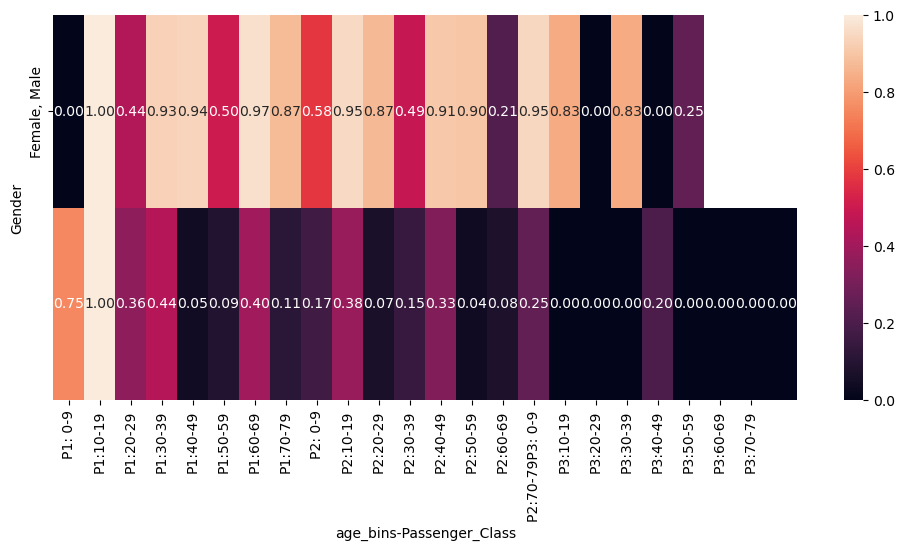

In [55]:
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)
passenger_df.dropna(inplace=True)

le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_Int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_Int', index=['Gender'], columns=['age_bins', 'Passenger_Class']) 
pivot_table.applymap(lambda x: 1-x)

plt.figure(figsize=(12,5))
x_axis_lables = ['P1: 0-9', 'P1:10-19', 'P1:20-29', 'P1:30-39', 'P1:40-49', 'P1:50-59', 'P1:60-69', 'P1:70-79',
                 'P2: 0-9', 'P2:10-19', 'P2:20-29', 'P2:30-39', 'P2:40-49', 'P2:50-59', 'P2:60-69', 'P2:70-79'
                 'P3: 0-9', 'P3:10-19', 'P3:20-29', 'P3:30-39', 'P3:40-49', 'P3:50-59', 'P3:60-69', 'P3:70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female, Male'], xticklabels=x_axis_lables, fmt='.2f', cmap='rocket')

### T-Test: Fare and Gender

While `Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and `ANOVA` test, target `continues` date.

#### How was Fare (price of passage) Affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes?
- Is there an interaction between gender and passenger class on the resulting fare?

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


Text(0.5, 1.0, 'Amount of Fare Paid Based on Gender')

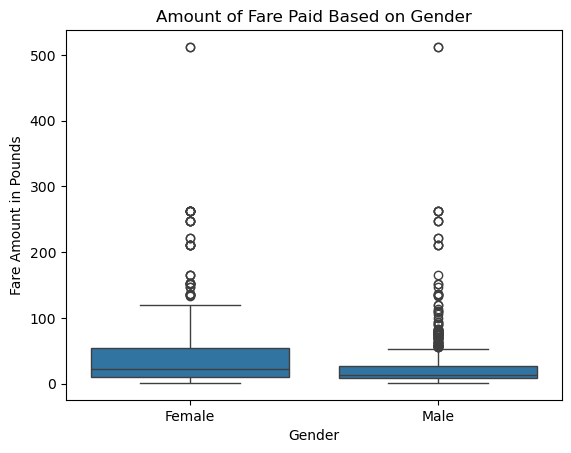

In [58]:
# Visulize the data using box plot
sns.boxplot(y=passenger_df['Fare_decimal'], x=passenger_df['Gender'])
plt.ylabel('Fare Amount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')

In [65]:
male = passenger_df['Fare_decimal'].loc[passenger_df['Gender']== 'Male']
male.describe()

count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64

In [66]:
female = passenger_df['Fare_decimal'].loc[passenger_df['Gender']== 'Female']
female.describe()

count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64

In [67]:
from scipy.stats import ttest_ind
# Drop null values
passenger_df.dropna(inplace=True)
male = passenger_df[passenger_df['Gender'] == 'Male']
female = passenger_df[passenger_df['Gender'] == 'Female']

statisics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])

print(f'T-test for face paid p-values {pvalue}')


T-test for face paid p-values 6.093364811911871e-13
